In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [2]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
cv2.__version__

'4.5.1'

***Super Resolution models:*** https://github.com/opencv/opencv_contrib/blob/master/modules/dnn_superres/README.md

**EDSR_x4.pb:** Model from the Enhanced Deep Residual Networks for Single Image Super-Resolution paper — increases the input image resolution by 4x

**ESPCN_x4.pb:** Super resolution model from Real-Time Single Image and Video Super-Resolution Using an Efficient Sub-Pixel Convolutional Neural Network — increases resolution by 4x

**FSRCNN_x3.pb:** Model from Accelerating the Super-Resolution Convolutional Neural Network — increases image resolution by 3x

**LapSRN_x8.pb:** Super resolution model from Fast and Accurate Image Super-Resolution with Deep Laplacian Pyramid Networks — increases image resolution by 8x

EDSR & ESPCN models are 4x resolution | FSRCNN = 3x | LAPSRN = 8x

________________________________________________________________________________________

**Reading Image and performing simple image enhancement**

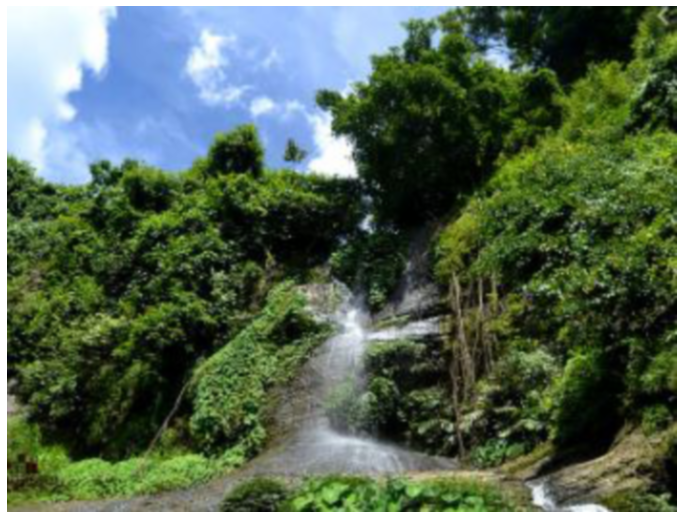

In [3]:
# Read image
image = cv2.imread("models/images/nature.jpg")

# Display image

plt.figure(figsize=[12,12])
plt.imshow(image[:,:,::-1], interpolation = 'bicubic');plt.axis('off'); # Bicubic Interpolation: 

Using that information, we instantiate our super resolution (sr) object, load the model from disk, and set the model name and scale

In [4]:
EDSR_model = sr.readModel('models/EDSR_x4.pb') # Try: models/ [ ESPCN_x4.pb, FSRCNN_x3.pb, LapSRN_x8.pb ]

model_scale = 4
model_name = "edsr"

sr.setModel(model_name, model_scale)

**Performing the upscaling using the pretrained EDSR model: sr**

In [5]:
Final_Img = sr.upsample(image)

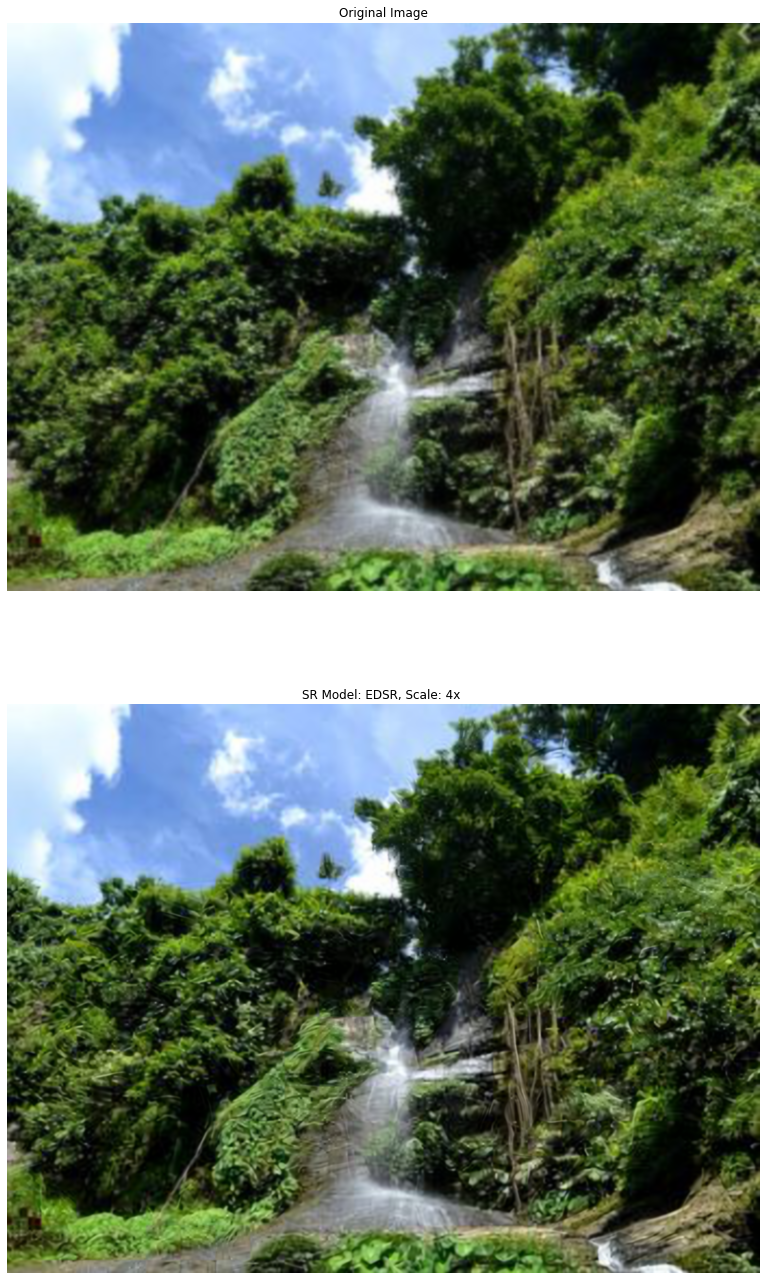

In [6]:
# Display Image
plt.figure(figsize=[23,23])
plt.subplot(2,1,1);plt.imshow(image[:,:,::-1], interpolation = 'bicubic');plt.title("Original Image");plt.axis("off");
plt.subplot(2,1,2);plt.imshow(Final_Img[:,:,::-1], interpolation = 'bicubic');
plt.title("SR Model: {}, Scale: {}x ".format(model_name.upper(),model_scale)); plt.axis("off");

In [7]:
print('Shape of Original Image: {} , Shape of Super Resolution Image: {}'.format(image.shape, Final_Img.shape))

Shape of Original Image: (262, 347, 3) , Shape of Super Resolution Image: (1048, 1388, 3)


Now in the same way just change the model name and achieve results for various models on images.

Metrics comparison b/w models: https://programmer.group/opencv-advanced-super-resolution-based-on-opencv.html

______________________________________________________________________________________________________

**Creating function for above:**

Initialisation Function: 

In [8]:
def init_super(model):
    
    # global variable
    global sr, model_name, model_scale
    
    # Create an SR object
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    
    # Define model path
    model_path = 'models/'+ model +'.pb'
    sr.setModel(model_name, model_scale)

    # Extract model name from model path
    model_name = model.split('_')[0].lower() # Splits from _ & puts first value
    
    # Extract model scale from model path
    model_scale = int(model.split("_")[1][1])
        
    # Read the desired model
    sr.readModel(model_path)
    
    sr.setModel(model_name, model_scale)

In [9]:
init_super("EDSR_x4")

**Main Function to upscale images**

In [10]:
def super_res(image, returndata=False, save_img=True, name='test.png', print_shape=True):
    
    # Upscale the image
    Final_Img = sr.upsample(image)
    
    if  returndata:
        return Final_Img
    
    else:
        
        if print_shape: # True
            print('Shape of Original Image: {} , Shape of Super Resolution Image: {}'.format(image.shape, Final_Img.shape))
            
    if save_img:
            cv2.imwrite("outputs/" + name, Final_Img)
        
    # Showing Image
    plt.figure(figsize=[25,25])
    plt.subplot(2,1,1);plt.imshow(image[:,:,::-1], interpolation = 'bicubic');plt.title("Original Image");plt.axis("off");
    plt.subplot(2,1,2);plt.imshow(Final_Img[:,:,::-1], interpolation = 'bicubic');
    plt.title("SR Model: {}, Scale: {}x ".format(model_name.upper(), model_scale)); plt.axis("off");

Example:

Shape of Original Image: (256, 256, 3) , Shape of Super Resolution Image: (768, 768, 3)


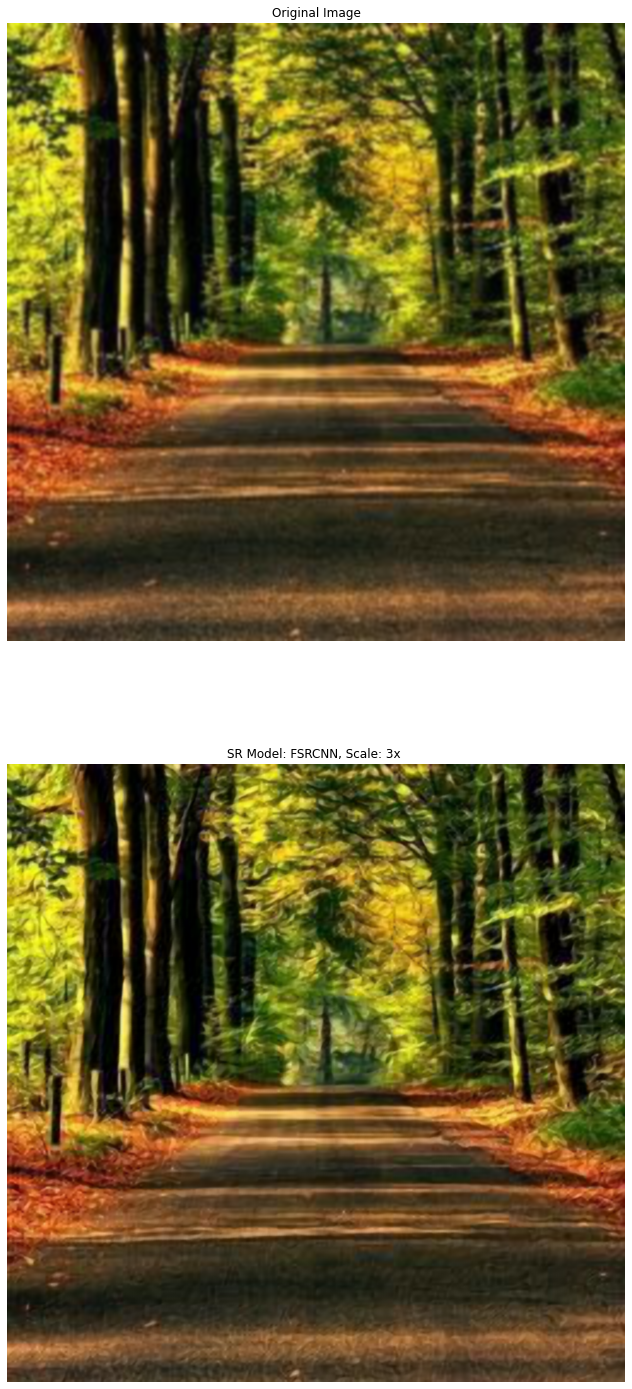

In [11]:
init_super("FSRCNN_x3")
image = cv2.imread("models/images/road.jpg") # Reads the image
super_res(image)

**Super Resolution Real-Time Video**

In [ ]:
fps=0
init_super("EDSR_x4")
cap = cv2.VideoCapture('models/images/demo1.mp4')


while(True):    
    
    start_time = time.time()
    ret,frame= cap.read() 
    
    if not ret: # returns true if the frame is available
        break
        
    image = cv2.flip(frame,1)
    
    image = super_res(image, returndata=True)
    
    cv2.putText(image, 'FPS: {:.2f}'.format(fps), (10, 20), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 20, 55), 1)
    cv2.imshow("Super Resolution", image)
    
    k = cv2.waitKey(1)
    fps= (1.0 / (time.time() - start_time))
    
    if k == ord('q'): # q = quit
        break
        
cap.release() 
cv2.destroyAllWindows() 